In [0]:
!apt-get install -y -qq software-properties-common module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131322 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&acces

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive
import os
import math

os.chdir("drive/msrda/msrda_depth")

In [0]:
fnames = []
for a in range(7, 17):
    for s in range(1, 11):
        for e in range(1, 3):
            fnames.append('a' + "{:02d}".format(a) + '_s' + "{:02d}".format(s) +
                          '_e' + "{:02d}".format(e) + '_depth.bin')
print(fnames)

['a07_s01_e01_depth.bin', 'a07_s01_e02_depth.bin', 'a07_s02_e01_depth.bin', 'a07_s02_e02_depth.bin', 'a07_s03_e01_depth.bin', 'a07_s03_e02_depth.bin', 'a07_s04_e01_depth.bin', 'a07_s04_e02_depth.bin', 'a07_s05_e01_depth.bin', 'a07_s05_e02_depth.bin', 'a07_s06_e01_depth.bin', 'a07_s06_e02_depth.bin', 'a07_s07_e01_depth.bin', 'a07_s07_e02_depth.bin', 'a07_s08_e01_depth.bin', 'a07_s08_e02_depth.bin', 'a07_s09_e01_depth.bin', 'a07_s09_e02_depth.bin', 'a07_s10_e01_depth.bin', 'a07_s10_e02_depth.bin', 'a08_s01_e01_depth.bin', 'a08_s01_e02_depth.bin', 'a08_s02_e01_depth.bin', 'a08_s02_e02_depth.bin', 'a08_s03_e01_depth.bin', 'a08_s03_e02_depth.bin', 'a08_s04_e01_depth.bin', 'a08_s04_e02_depth.bin', 'a08_s05_e01_depth.bin', 'a08_s05_e02_depth.bin', 'a08_s06_e01_depth.bin', 'a08_s06_e02_depth.bin', 'a08_s07_e01_depth.bin', 'a08_s07_e02_depth.bin', 'a08_s08_e01_depth.bin', 'a08_s08_e02_depth.bin', 'a08_s09_e01_depth.bin', 'a08_s09_e02_depth.bin', 'a08_s10_e01_depth.bin', 'a08_s10_e02_depth.bin',

In [0]:
# Byte order: little/big endian.
bo = "little"
frameRate = 30

for fname in fnames:
    with open(fname, "rb") as f:
        nframes = int.from_bytes(f.read(4), bo)
        ncols = int.from_bytes(f.read(4), bo)
        nrows = int.from_bytes(f.read(4), bo)
        count = 0

        for frameId in range(nframes):
            if frameId % math.floor(frameRate) == 0:
                filename = fname[:-4] + "_frame%d.txt" % count
                count += 1
                with open(filename, "w") as g:
                    for i in range(nrows):
                        # Read and write depth data.
                        for j in range(ncols):
                            if j != 0:
                                g.write(',')
                            g.write(str(int.from_bytes(f.read(4), bo)))
                        g.write('\n')
            
                        # Simply skip Kinect skeleton data.
                        f.read(ncols)
            else:
                for i in range(nrows):
                    f.read(5 * ncols)
    
    print ("Done for " + fname)

Done for a07_s01_e01_depth.bin
Done for a07_s01_e02_depth.bin
Done for a07_s02_e01_depth.bin
Done for a07_s02_e02_depth.bin
Done for a07_s03_e01_depth.bin
Done for a07_s03_e02_depth.bin
Done for a07_s04_e01_depth.bin
Done for a07_s04_e02_depth.bin
Done for a07_s05_e01_depth.bin
Done for a07_s05_e02_depth.bin
Done for a07_s06_e01_depth.bin
Done for a07_s06_e02_depth.bin
Done for a07_s07_e01_depth.bin
Done for a07_s07_e02_depth.bin
Done for a07_s08_e01_depth.bin
Done for a07_s08_e02_depth.bin
Done for a07_s09_e01_depth.bin
Done for a07_s09_e02_depth.bin
Done for a07_s10_e01_depth.bin
Done for a07_s10_e02_depth.bin
Done for a08_s01_e01_depth.bin
Done for a08_s01_e02_depth.bin
Done for a08_s02_e01_depth.bin
Done for a08_s02_e02_depth.bin
Done for a08_s03_e01_depth.bin
Done for a08_s03_e02_depth.bin
Done for a08_s04_e01_depth.bin
Done for a08_s04_e02_depth.bin
Done for a08_s05_e01_depth.bin
Done for a08_s05_e02_depth.bin
Done for a08_s06_e01_depth.bin
Done for a08_s06_e02_depth.bin
Done for

### Testing...

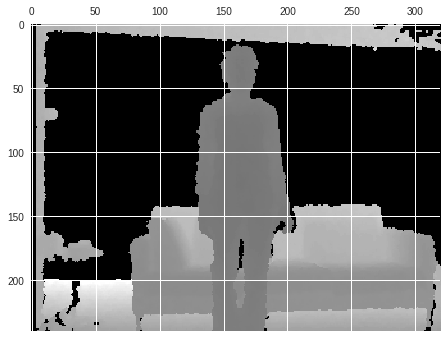

In [0]:
import matplotlib.pyplot as plt

f = open("a16_s10_e02_depth_frame0.txt", "r")
l = [[int(num) for num in line.split(',')] for line in f ]

plt.matshow(l, cmap=plt.cm.gist_gray)
plt.show()